In [2]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the data
leads= pd.read_csv("leads.csv")

In [4]:
#check top 5 rows
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# we can rid off prospect ID as it's neccessary feature for our model
leads = leads.drop('Prospect ID', axis=1)

#### We can also see above that some columns having values as "Select". we will convert these values to NaN 

In [6]:
#now let's check some basic stats
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
leads.shape

(9240, 36)

In [8]:
# we have around 9240 rows and 35 columns

#### Check and treat NaN values

In [9]:
# lets check NA values in each columns
#find out %age of NaN values in every columns
list= []
for i in leads.columns:
    if leads[i].isna().sum() != 0:
        list.append(i + "--" + str(round((leads[i].isna().sum()/9240)*100,2))+ "%" )       
list

['Lead Source--0.39%',
 'TotalVisits--1.48%',
 'Page Views Per Visit--1.48%',
 'Last Activity--1.11%',
 'Country--26.63%',
 'Specialization--15.56%',
 'How did you hear about X Education--23.89%',
 'What is your current occupation--29.11%',
 'What matters most to you in choosing a course--29.32%',
 'Tags--36.29%',
 'Lead Quality--51.59%',
 'Lead Profile--29.32%',
 'City--15.37%',
 'Asymmetrique Activity Index--45.65%',
 'Asymmetrique Profile Index--45.65%',
 'Asymmetrique Activity Score--45.65%',
 'Asymmetrique Profile Score--45.65%']

In [10]:
#lets drop Asymmetrique Activity Index, Asymmetrique Activity Score,
#Asymmetrique Profile Index, Asymmetrique Profile Score as it contains more than 40% missing values
#I didn't remove Lead Quality columns as it looks like an important feature right now 

leads=leads.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index',
                  'Asymmetrique Profile Score'], axis=1)

In [11]:
#validate columsn again
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [12]:
# we can see Lead Source, TotalVisits, Page Views Per Visit, Last Activity having very less NaN values.
#so, we can drop Null values rows
leads.dropna(subset=['Lead Source','TotalVisits','Page Views Per Visit','Last Activity'], inplace= True)

In [13]:
#check columns having null values
leads.isna().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2296
Specialization                                   1431
How did you hear about X Education               2200
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

##### Check each column which having only NaN values

In [14]:
# Check Lead Quality column which having NaN values
leads['Lead Quality'].value_counts()

Might be             1519
Not Sure             1086
Worst                 601
High in Relevance     592
Low in Relevance      556
Name: Lead Quality, dtype: int64

In [15]:
#Fill NaN values with "Might be" as it's most frequent value of Lead Quality feature
leads['Lead Quality'].fillna(value='Might be', inplace=True)

In [16]:
#check value_counts after imputation
leads['Lead Quality'].value_counts()

Might be             6239
Not Sure             1086
Worst                 601
High in Relevance     592
Low in Relevance      556
Name: Lead Quality, dtype: int64

In [17]:
#let's check NaN values in Country columns
leads['Country'].isna().sum()

2296

In [18]:
# check all values in Country column
leads['Country'].value_counts()

India                   6491
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [19]:
leads['Country'].mode()

0    India
Name: Country, dtype: object

In [20]:
#let's impute NaN values with India as it's most frequent country in the column
leads['Country'].fillna(leads['Country'].mode()[0], inplace=True)

In [21]:
#validate imputation
leads['Country'].isna().sum()

0

In [22]:
#Check Tags column
leads['Tags'].value_counts()

Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [23]:
#lets impute NaN values with 'Will revert after reading the email' as it's most frequent value 
leads.loc[leads['Tags'].isna(),'Tags']='Will revert after reading the email'

In [24]:
#Validate imputation
leads['Tags'].value_counts()

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [25]:
#now  check 'What matters most to you in choosing a course' columns
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6370
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [26]:
leads['What matters most to you in choosing a course'].mode()[0]
#impute NaN with 'Better Career Prospects'
leads['What matters most to you in choosing a course'].fillna(leads['What matters most to you in choosing a course'].mode()[0], inplace=True)

In [27]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9072
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [28]:
#lets check 'What is your current occupation' columns
leads['What is your current occupation'].value_counts()

Unemployed              5476
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
#lets impute NaN values with 'Unemployed'
leads['What is your current occupation'].fillna('Unemployed', inplace=True)

In [30]:
# check value counts
leads['What is your current occupation'].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

#### Let's analyze and impute values for columns which having both "Select" and "NaN" values 

In [31]:
#lets check How did you hear about X Education columns
leads['How did you hear about X Education'].value_counts()

Select                   4886
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [32]:
# we can see it contains select values lets impute them with NaN values
leads.loc[leads['How did you hear about X Education']=='Select','How did you hear about X Education']=np.NaN

In [33]:
#validate imputation
leads['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            347
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              66
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [34]:
#now checl %age of NaN values
(leads['How did you hear about X Education'].isna().sum()/len(leads))*100

78.09124972448754

In [35]:
# now we have 78%age NaN values it's better to drop this columns
leads=leads.drop(['How did you hear about X Education'], axis=1)

In [36]:
#now check specialization
leads['Specialization'].value_counts()

Select                               1851
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [37]:
#we can see it contains few values as 'Select'
leads.loc[leads['Specialization']=='Select','Specialization'] = np.NaN

In [38]:
# we have around 3282 value. User might not be sure at the time of form submission about specailization. let's impute Nan
#value with others
leads['Specialization'].fillna('Others', inplace=True)

In [39]:
leads.isna().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [40]:
## check city column now
leads['City'].value_counts()

Mumbai                         3177
Select                         2156
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [41]:
#check NaN Values in City
leads['City'].isna().sum()

1419

In [42]:
#we can see there are some 'Select' values. We assume that there might be chance that user didn't
#put any values or forget to put any value so we impute select values with NaN values
leads.loc[leads['City']=='Select', 'City']= np.NaN

In [43]:
#Check NaN values after imputation
leads['City'].isna().sum()

3575

In [44]:
# let's impute "Mumbai" as it's most frequent city
leads['City'].fillna('Mumbai', inplace= True)

In [45]:
leads['City'].value_counts()

Mumbai                         6752
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [46]:
leads.isna().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [47]:
#now check Lead Profile
leads['Lead Profile'].value_counts()

Select                         4055
Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [48]:
#we have some values as Select then we need to change those values as NaN
leads.loc[leads['Lead Profile']=='Select', 'Lead Profile']=np.NaN

In [49]:
leads['Lead Profile'].value_counts()

Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [50]:
leads['Lead Profile'].isna().sum()

6757

In [51]:
# check percentage of NaN values
(leads['Lead Profile'].isna().sum()/len(leads))*100

74.46550584086401

In [52]:
#we can see we have 74% values as NaN it's better to drop Lead Profile column
leads= leads.drop(['Lead Profile'], axis=1)

In [53]:
leads.isna().sum()

Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [54]:
# check Magazine column
leads['Magazine'].value_counts()

No    9074
Name: Magazine, dtype: int64

In [55]:
#check X Education Forums column
leads['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [56]:
# As we can see above, X Education Forums column has almost all values as "No". 
#this column won't added any information to our analysis, will drop it

In [57]:
#Check Newspaper Article column
leads['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [58]:
# this column also have almost all values as "No". This column should be dropped as well

In [59]:
#Check Newspaper column
leads['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [60]:
# Newspaper columns also have almost all values as "No". this column should also be dropped

In [61]:
# check Digital Advertisement
leads['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [62]:
# Digital Advertisement column also have almost all values as "No". this column should also be dropped

In [63]:
leads['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [64]:
leads['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [65]:
leads['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [66]:
leads['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [67]:
leads['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

#### As we can see above,'Magazine', 'X Education Forums', 'Newspaper Article', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'
#### 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'
#### all these columns are highly skewed(having almost same values) so, it won't added any information to our analysis
#### We will drop all these columns in one go

In [68]:
l=['Magazine', 'X Education Forums', 'Newspaper Article', 'Newspaper', 'Digital Advertisement',
   'Through Recommendations','Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
   'Get updates on DM Content', 'I agree to pay the amount through cheque']

In [69]:
leads= leads.drop(l, axis=1)

In [70]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Tags',
       'Lead Quality', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

### checking outliers

In [71]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


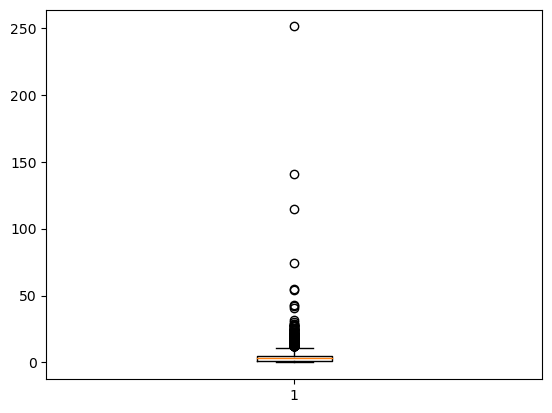

In [72]:
# plot boxplot for Tota;Visits
plt.boxplot([leads.TotalVisits])
plt.show()

In [73]:
## we can see there are some outliers in totalvisit columns
leads[leads['TotalVisits']>35]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
1160,647818,Landing Page Submission,Direct Traffic,No,No,0,43.0,57,3.91,Email Opened,India,Marketing Management,Unemployed,Better Career Prospects,No,Not doing further education,Not Sure,Thane & Outskirts,No,Email Opened
2190,638668,Landing Page Submission,Direct Traffic,Yes,No,0,55.0,297,55.00,Page Visited on Website,India,IT Projects Management,Unemployed,Better Career Prospects,No,Will revert after reading the email,Might be,Other Cities,Yes,Modified
2322,637257,Landing Page Submission,Direct Traffic,Yes,No,0,141.0,755,6.71,Page Visited on Website,India,Human Resource Management,Unemployed,Better Career Prospects,No,Will revert after reading the email,Might be,Mumbai,Yes,Page Visited on Website
5283,609249,Landing Page Submission,Direct Traffic,Yes,No,0,74.0,1209,12.33,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,No,Not doing further education,Not Sure,Thane & Outskirts,No,Page Visited on Website
5530,607494,Landing Page Submission,Direct Traffic,Yes,No,0,41.0,311,1.14,Page Visited on Website,India,Retail Management,Unemployed,Better Career Prospects,No,Will revert after reading the email,Might be,Other Cities,No,Page Visited on Website
5538,607470,Landing Page Submission,Referral Sites,No,No,0,54.0,1280,4.50,SMS Sent,India,Others,Unemployed,Better Career Prospects,No,Will revert after reading the email,Might be,Mumbai,No,SMS Sent
5608,606961,Landing Page Submission,Referral Sites,Yes,No,0,115.0,187,8.21,Page Visited on Website,India,Rural and Agribusiness,Unemployed,Better Career Prospects,No,Will revert after reading the email,Might be,Mumbai,No,Page Visited on Website
6102,602958,Landing Page Submission,Direct Traffic,No,No,1,251.0,49,1.48,Page Visited on Website,India,Supply Chain Management,Unemployed,Better Career Prospects,No,Interested in other courses,Not Sure,Mumbai,Yes,Page Visited on Website
8230,587083,Landing Page Submission,Direct Traffic,Yes,No,0,42.0,1148,3.82,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,No,Not doing further education,Worst,Thane & Outskirts,No,Modified


In [74]:
## lets analyze more by checking qunatiles

In [75]:
leads['TotalVisits'].describe(percentiles=[.25,.5,.75,.9,.95,.99,.995])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
99.5%      21.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [76]:
## we can see there is sharp spike after 99.5%. we will cap all values to 35 which are having values greater than 35
leads['TotalVisits']= leads['TotalVisits'].apply(lambda x: 35 if x>35 else x)

In [77]:
# validate
leads['TotalVisits'].describe()

count    9074.000000
mean        3.400816
std         3.573128
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        35.000000
Name: TotalVisits, dtype: float64

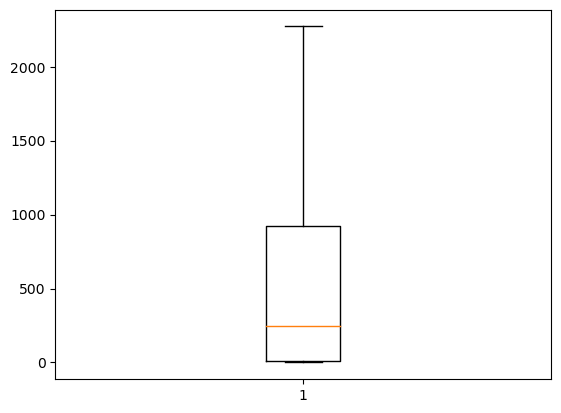

In [78]:
# now check Total Time Spent on Website column
plt.boxplot([leads['Total Time Spent on Website']])
plt.show()

In [79]:
## we can see above there is no potential outliers in Total Time Spent on Website column

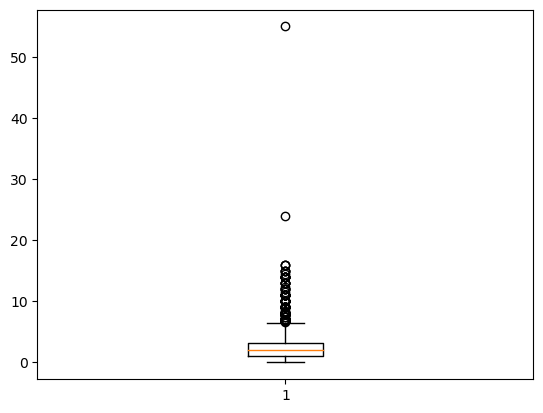

In [80]:
#let's check Page Views Per Visit column
plt.boxplot([leads['Page Views Per Visit']])
plt.show()

In [81]:
### looks like data is coninuous but there are few outliers. let's analyze 
leads['Page Views Per Visit'].describe(percentiles=[.25,.5,.75,.9,.95,.99,.995])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
99%         9.000000
99.5%      11.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [82]:
## we can see there is a shape spike after 95%. let's check how may records having more than 15 value
leads[leads['Page Views Per Visit']>15]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
125,659241,API,Referral Sites,No,No,0,16.0,53,16.0,Olark Chat Conversation,India,Others,Unemployed,Better Career Prospects,No,Will revert after reading the email,Might be,Mumbai,No,Modified
2190,638668,Landing Page Submission,Direct Traffic,Yes,No,0,35.0,297,55.0,Page Visited on Website,India,IT Projects Management,Unemployed,Better Career Prospects,No,Will revert after reading the email,Might be,Other Cities,Yes,Modified
5164,610357,Landing Page Submission,Direct Traffic,Yes,No,0,16.0,103,16.0,Page Visited on Website,India,Finance Management,Unemployed,Better Career Prospects,No,Will revert after reading the email,Might be,Mumbai,Yes,Modified
5495,607748,Landing Page Submission,Google,Yes,No,0,16.0,462,16.0,Page Visited on Website,India,IT Projects Management,Unemployed,Better Career Prospects,No,Already a student,Worst,Other Cities of Maharashtra,Yes,Modified
6805,597579,API,Organic Search,No,No,1,24.0,1527,24.0,Page Visited on Website,unknown,Others,Unemployed,Better Career Prospects,No,Will revert after reading the email,Might be,Mumbai,No,Modified


In [83]:
## we can see there is sharp spike after 99%. we will cap all values to 15 which are having values greater than 17
leads['Page Views Per Visit']= leads['Page Views Per Visit'].apply(lambda x: 15 if x>15 else x)

### Univariate Analysis

In [84]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Tags',
       'Lead Quality', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

<AxesSubplot:>

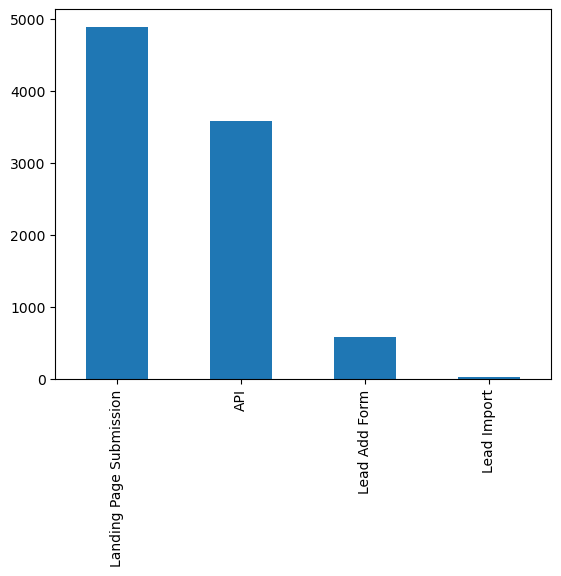

In [85]:
#let's check Lead Origin column
leads['Lead Origin'].value_counts().plot.bar()

#### we can see above most of the leads comes from "Landing page submission" followed by "API"

<AxesSubplot:>

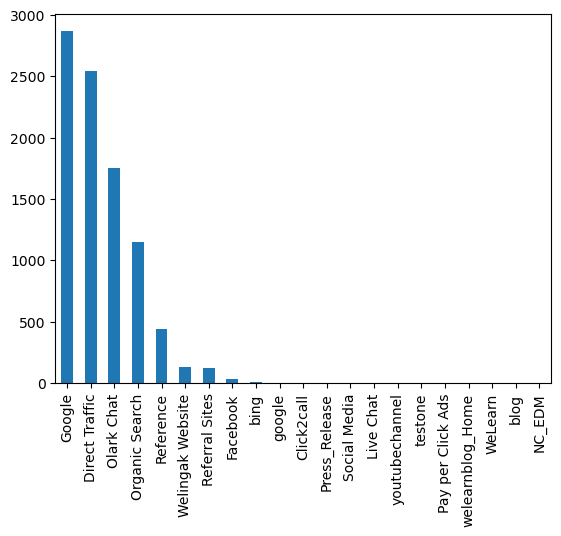

In [86]:
leads['Lead Source'].value_counts().plot.bar()

#### we can see, there are two values as Google and google let's put both in one bin and there are also some categories like click2 call,press_Release, Social_media,  live chat till NC_EDM which came only once or twice, we will create new bin "Others" & put all this in this category.

In [87]:
# we can there are two values as Google and google let's put both in one bin and there are also some categories
#like click2 call,press_Release, Social_media,  live chat till NC_EDM which came only one or twice, we will create new bin as "Others"
#put all this in Others.

def bin(x):
    if x == 'google':
        return 'Google'
    elif x in ['Press_Release', 'Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads'
               ,'welearnblog_Home','WeLearn','blog','NC_EDM']:
        return 'Others'
    else:
        return x
leads['Lead Source']=leads['Lead Source'].apply(bin)


In [88]:
leads['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                13
bing                   6
Click2call             4
Name: Lead Source, dtype: int64

#### we can see above, most of lead coming from "Google" 

<AxesSubplot:>

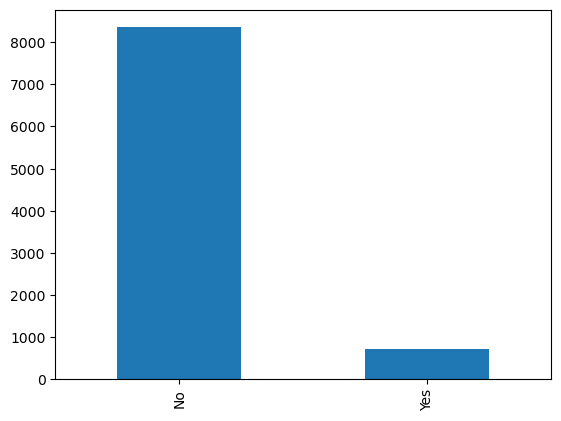

In [89]:
#let's check Lead Origin column
leads['Do Not Email'].value_counts().plot.bar()

#### we can see above,most of the customers don't want to get email about courses from X

In [90]:
#let's check Do Not Call column
leads['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [91]:
# we can drop 'Do not Call' as there is no variationin values. it doesnt add any information in our analysis
leads=leads.drop("Do Not Call", axis=1)

In [92]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Tags',
       'Lead Quality', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

<AxesSubplot:>

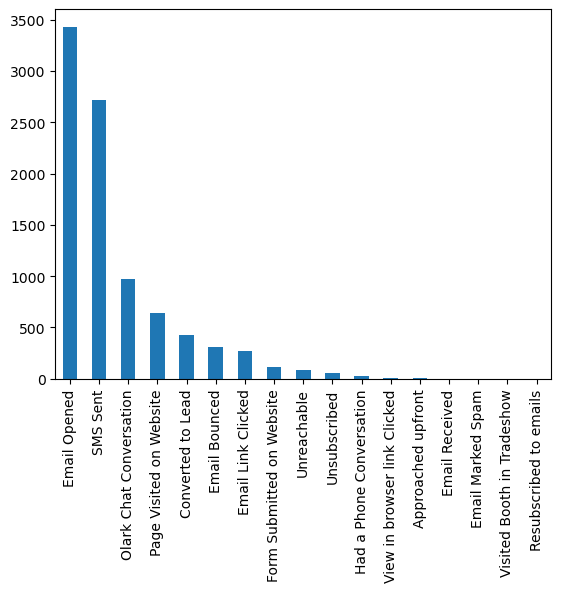

In [93]:
#let's check Last Activity column
leads['Last Activity'].value_counts().plot.bar()

In [94]:
leads['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### we can see there are some Last Activity which comes very few times in our dataset. we will bin those to "Others activity"

In [95]:
leads['Last Activity']=leads['Last Activity'].apply(lambda x: "Others Activity" if x in ['View in browser link Clicked','Approached upfront'
                                                                                        ,'Email Received','Email Marked Spam','Visited Booth in Tradeshow'
                                                                                        ,'Resubscribed to emails'] else x)


In [96]:
leads['Last Activity'].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   59
Had a Phone Conversation       25
Others Activity                17
Name: Last Activity, dtype: int64

#### We can see above most of the leads has "Email opened" as last activity and very few leads resubscribed to email

<AxesSubplot:>

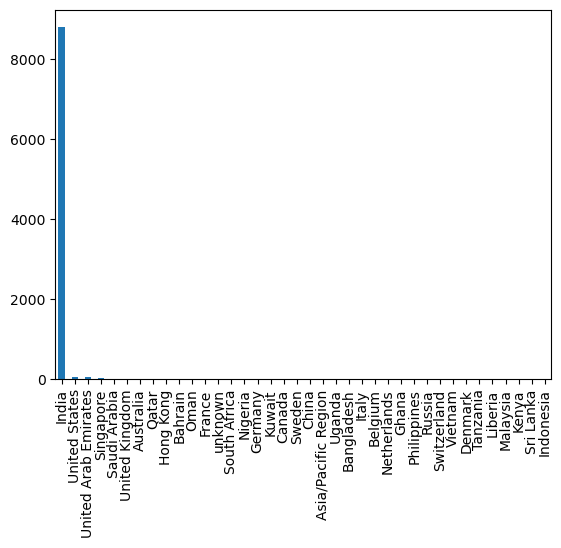

In [97]:
#let's check Last Activity column
leads['Country'].value_counts().plot.bar()

#### we can see above, most of the leads are from India

<AxesSubplot:>

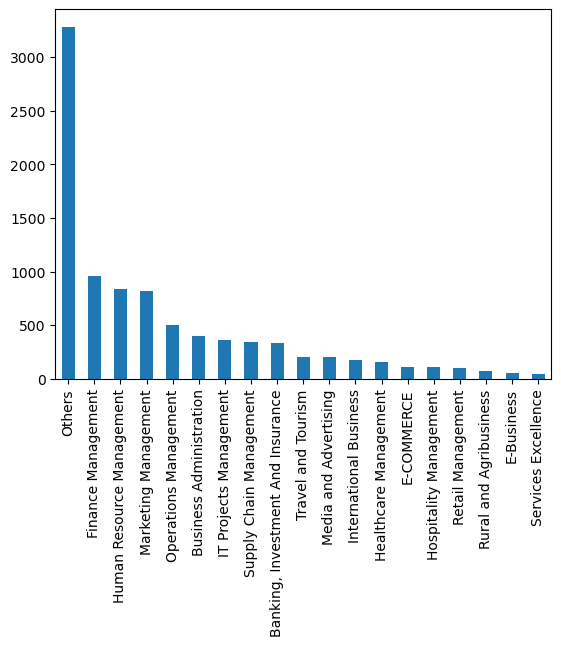

In [98]:
#let's check Specialization column
leads['Specialization'].value_counts().plot.bar()

#### most of the leads are from Finance Management followed by HR Management and most of the leads have other specailization

<AxesSubplot:>

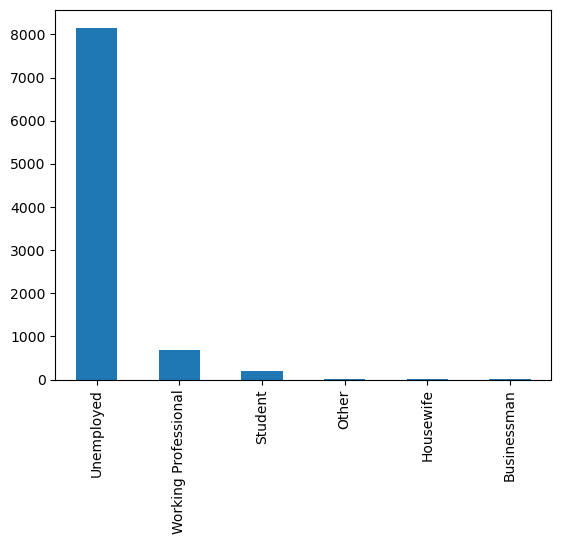

In [99]:
#let's check Last Activity column
leads['What is your current occupation'].value_counts().plot.bar()

#### most of the leads are unemployed followed by working professional

In [100]:
#let's check What matters most to you in choosing a course column
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9072
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [101]:
## we can see values are higly skewed. it's better to drop this column
leads = leads.drop("What matters most to you in choosing a course", axis=1)

In [102]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Tags', 'Lead Quality',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [103]:
#let's check Last Activity column
leads['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [104]:
### as we can see.Search having most of the values as "No"and it's not added any information tour analysis
### it's better to drop this column
leads=leads.drop("Search", axis=1)

In [105]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [106]:
leads['Tags'].value_counts()

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [107]:
### let's put invalid number, wrong number given, number not provided in switched off category as all these values are similar
### also let's put data which comes very less in "Others"
def binning(x):
    if x in ['invalid number','wrong number given','number not provided']:
        return 'switched off'
    elif x in ['Lost to Others','Still Thinking','Want to take admission but has financial problems',
               'In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month',
              'University not recognized','Recognition issue (DEC approval)']:
        return 'Other Tags'
    else:
        return x
leads['Tags']=leads['Tags'].apply(binning)


<AxesSubplot:>

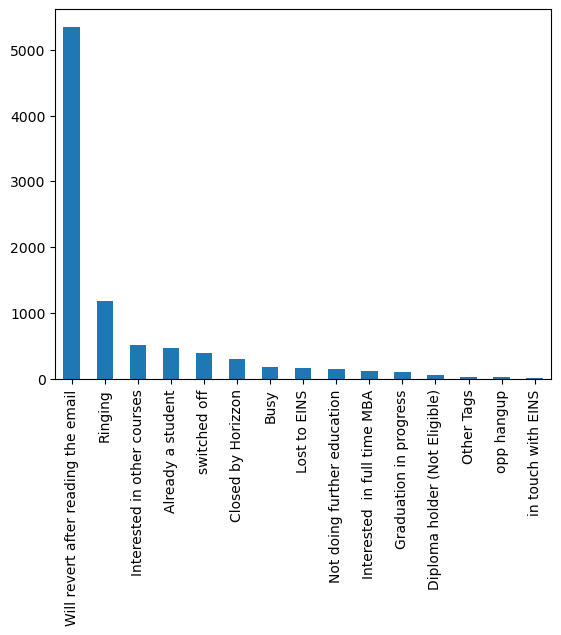

In [108]:
#let's check Last Activity column
leads['Tags'].value_counts().plot.bar()

In [109]:
leads['Tags'].value_counts()

Will revert after reading the email    5343
Ringing                                1187
Interested in other courses             509
Already a student                       465
switched off                            395
Closed by Horizzon                      301
Busy                                    185
Lost to EINS                            172
Not doing further education             145
Interested  in full time MBA            116
Graduation in progress                  111
Diploma holder (Not Eligible)            63
Other Tags                               37
opp hangup                               33
in touch with EINS                       12
Name: Tags, dtype: int64

#### most of the leads have "will revert after reading the email" as current status

<AxesSubplot:>

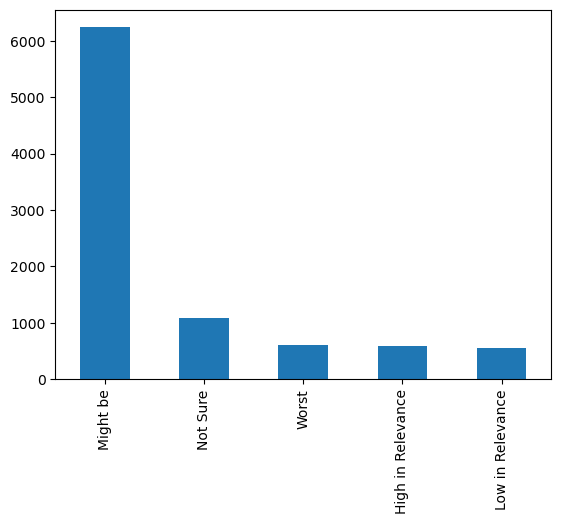

In [110]:
#let's check Lead Quality column
leads['Lead Quality'].value_counts().plot.bar()

<AxesSubplot:>

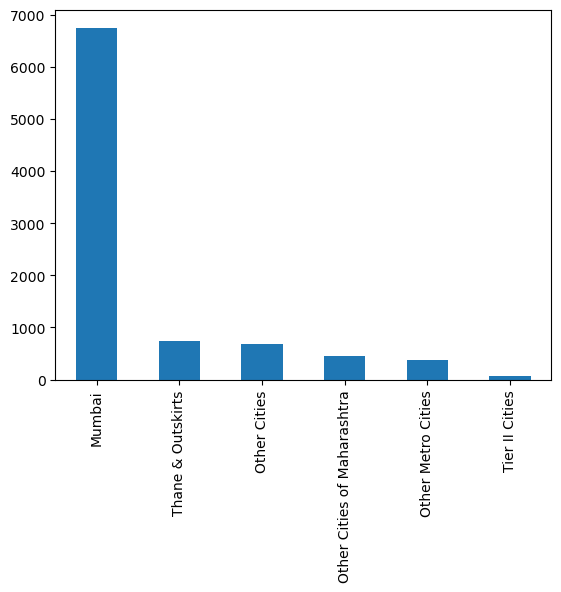

In [111]:
#let's check City column
leads['City'].value_counts().plot.bar()

In [112]:
### we can see, most of the leads are from Mumbai followed by Thane & outskirts

<AxesSubplot:>

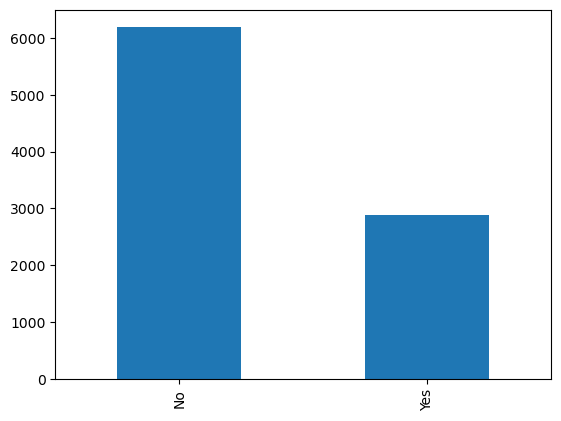

In [113]:
#let's check A free copy of Mastering The Interview column
leads['A free copy of Mastering The Interview'].value_counts().plot.bar()

#### As we can above, most of the leads don't want to get a free copy of Mastering interview

In [114]:
leads['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [115]:
### let put data in new bin 'Other Last Notable Activity' which comes very less.
def bin(x):
    if x in ['Email Marked Spam','Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website'
            ,'Email Received']:
        return 'Other Last Notable Activity'
    else:
        return x
leads['Last Notable Activity']=leads['Last Notable Activity'].apply(bin)

<AxesSubplot:>

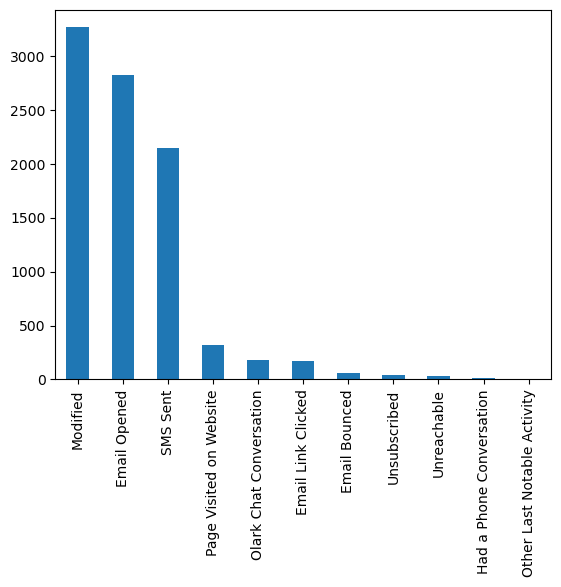

In [116]:
#let's check A free copy of Mastering The Interview column
leads['Last Notable Activity'].value_counts().plot.bar()

In [117]:
leads['Last Notable Activity'].value_counts()

Modified                       3267
Email Opened                   2823
SMS Sent                       2152
Page Visited on Website         318
Olark Chat Conversation         183
Email Link Clicked              173
Email Bounced                    60
Unsubscribed                     45
Unreachable                      32
Had a Phone Conversation         14
Other Last Notable Activity       7
Name: Last Notable Activity, dtype: int64

#### As we can see above, "Modified" activity is the most last notable activity of student

In [119]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

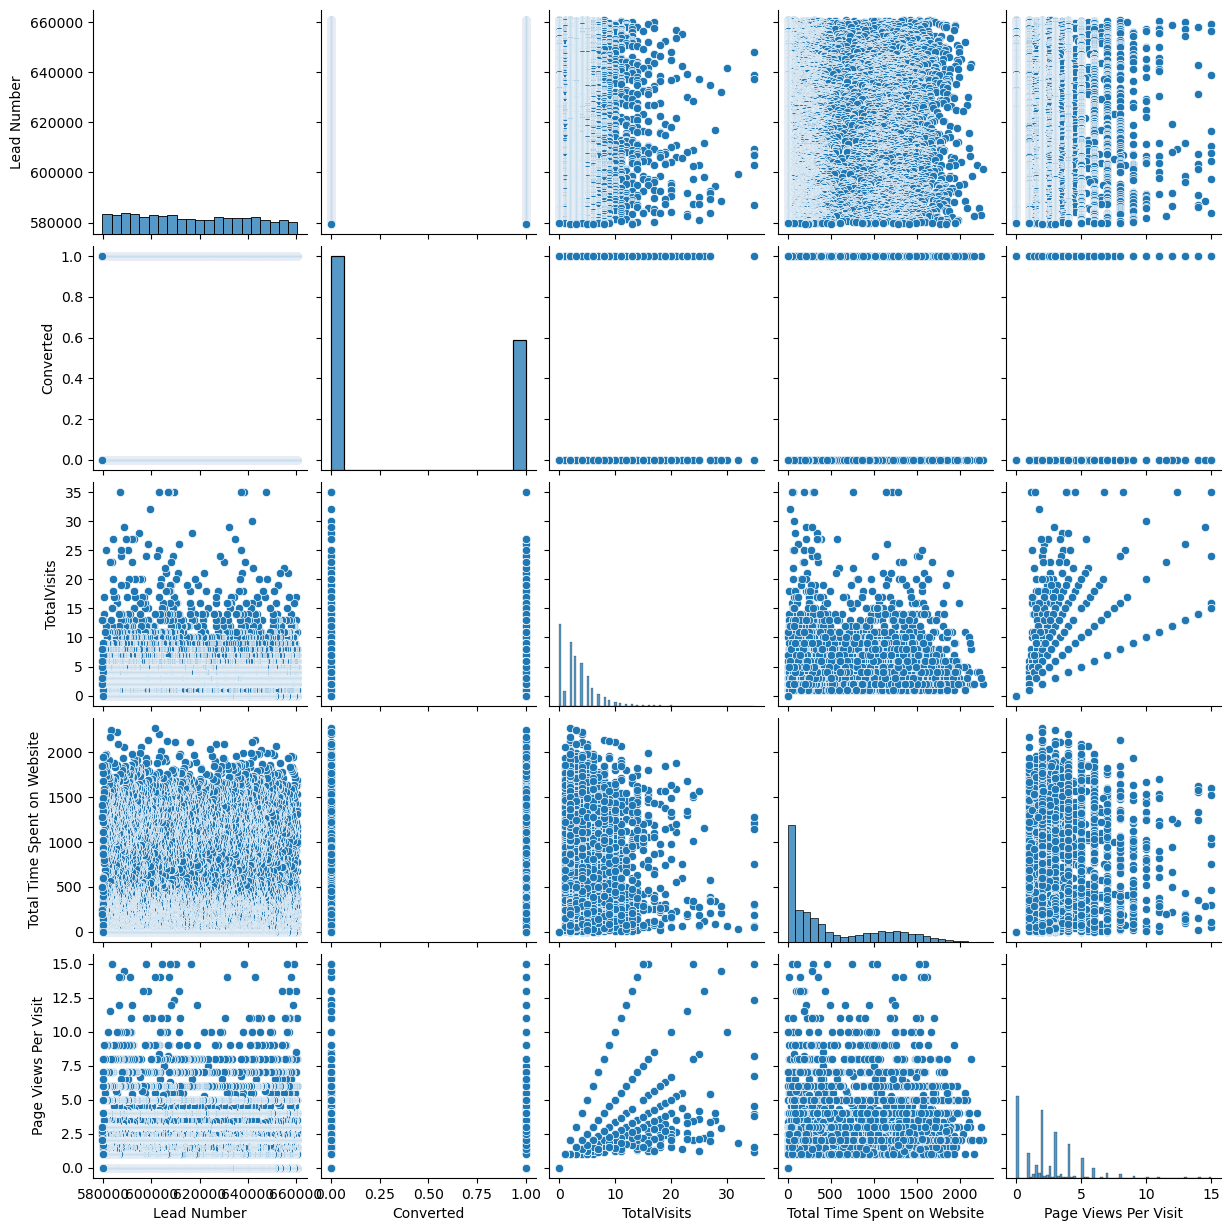

In [122]:
#let's draw pair plot to check whether there is any linear relationship b/w variables
sns.pairplot(leads)
plt.show()

### Bivariate analysis of categorical columns with dependent variable

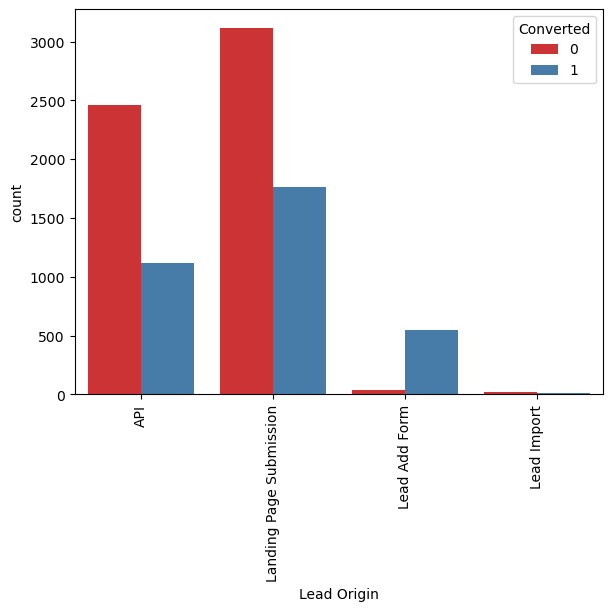

In [5108]:
# plot bar chart for Lead Origin with Target variable
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data= leads , hue='Converted' , x='Lead Origin', palette='Set1')
plt.xticks(rotation = 90)
plt.show()

#### As we can see above, Leads having Origin "Lead Add Form" have very high conversion rate

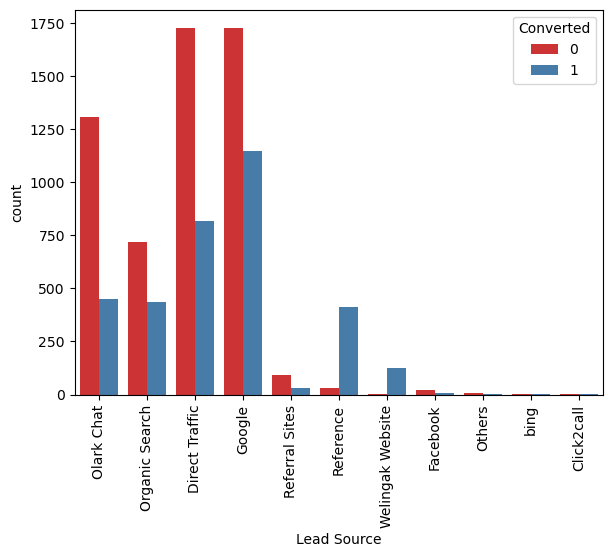

In [5109]:
# plot bar chart for Lead Source with Target variable
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data= leads , hue='Converted' , x='Lead Source', palette='Set1')
plt.xticks(rotation = 90)
plt.show()

#### As per above analysis, Reference & Welingak Website have very high conversion rate in compare of Google as lead source

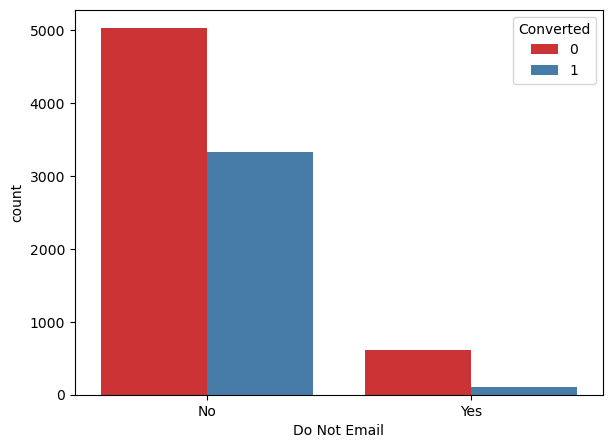

In [5110]:
# plot bar chart for Do Not Email with Target variable
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data= leads , hue='Converted' , x='Do Not Email', palette='Set1')
plt.show()

#### we cannot drawn any conclusion from above plot

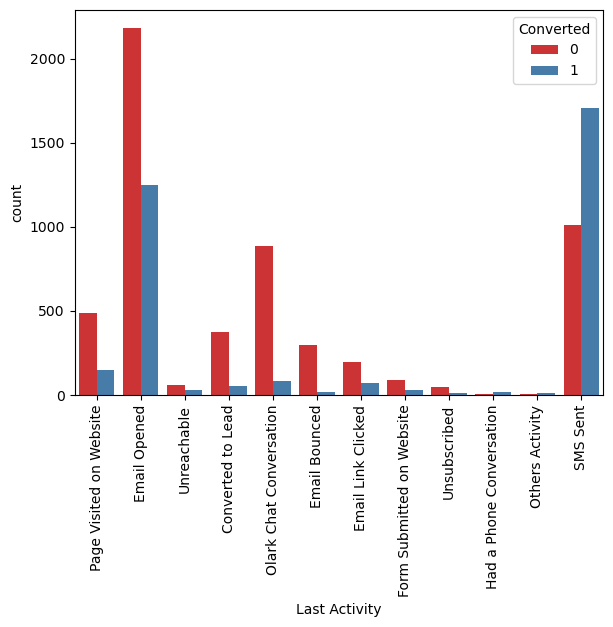

In [5111]:
# plot bar chart for Last Activity with Target variable
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data= leads , hue='Converted' , x='Last Activity', palette='Set1')
plt.xticks(rotation = 90)
plt.show()

#### As per above analysis, leads who have SMS Sent as last activity having high conversion rate

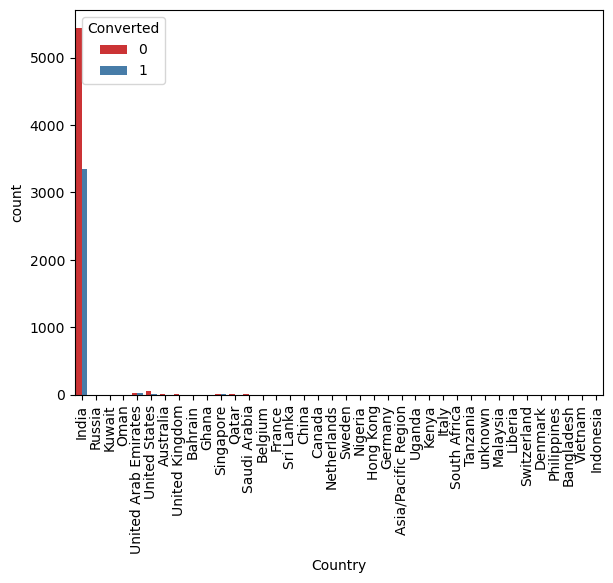

In [5112]:
# plot bar chart for Country with Target variable
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data= leads , hue='Converted' , x='Country', palette='Set1')
plt.xticks(rotation = 90)
plt.show()

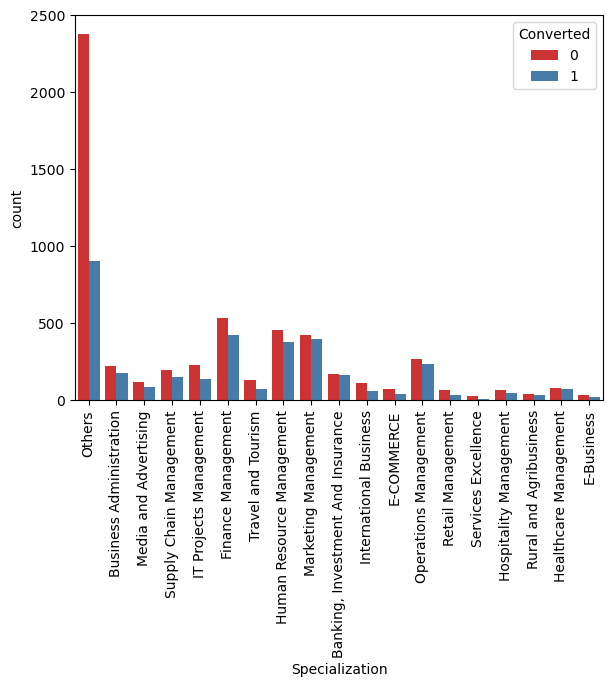

In [5113]:
# plot bar chart for Specialization with Target variable
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data= leads , hue='Converted' , x='Specialization', palette='Set1')
plt.xticks(rotation = 90)
plt.show()

#### As we can see above,Human Resource Management, Maketing Managment, Operation Management having high conversion rate 

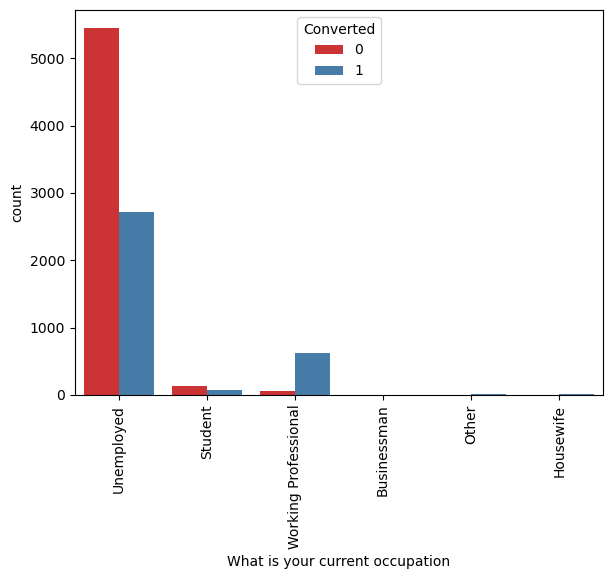

In [5114]:
# plot bar chart for What is your current occupation with Target variable
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data= leads , hue='Converted' , x='What is your current occupation', palette='Set1')
plt.xticks(rotation = 90)
plt.show()

#### As we can see above, Working Professionals having high conversion rate and more likely to be converted

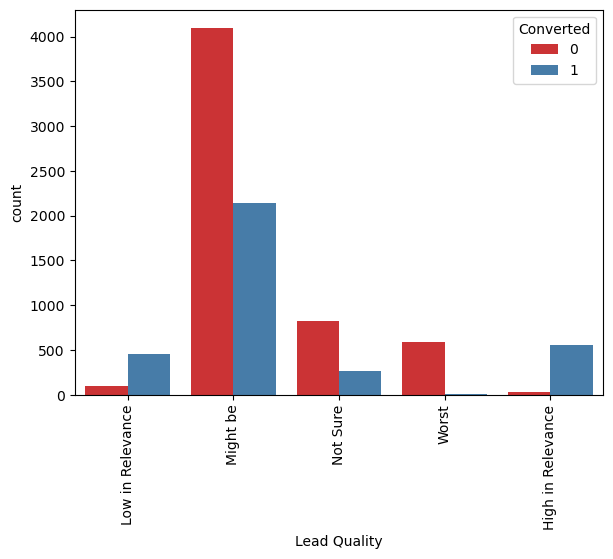

In [5115]:
# plot bar chart for Lead Quality with Target variable
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data= leads , hue='Converted' , x='Lead Quality', palette='Set1')
plt.xticks(rotation = 90)
plt.show()

#### As we can see above, "High in Relevance" having very high conversion rate across all lead quality categories

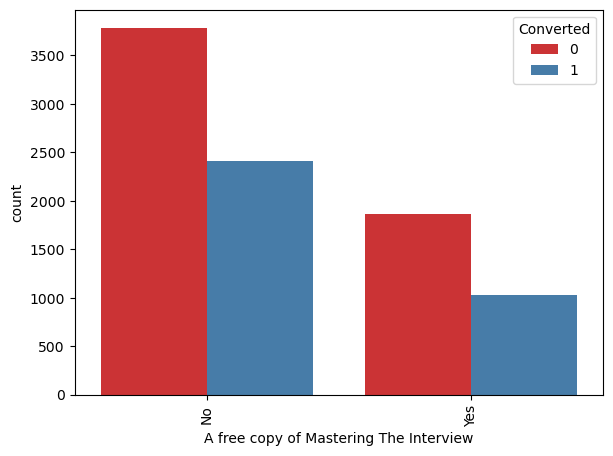

In [5116]:
# plot bar chart for A free copy of Mastering The Interview with Target variable
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data= leads , hue='Converted' , x='A free copy of Mastering The Interview', palette='Set1')
plt.xticks(rotation = 90)
plt.show()

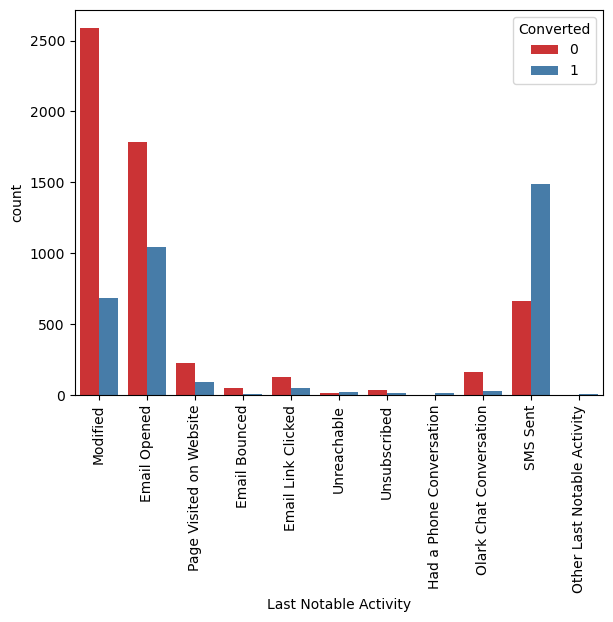

In [5117]:
# plot bar chart for Last Notable Activity with Target variable
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data= leads , hue='Converted' , x='Last Notable Activity', palette='Set1')
plt.xticks(rotation = 90)
plt.show()

#### As we can visualize above, Leads who having SMS Sent as last activity are likely to be converted 

### Bivariate analysis with numerical variable

In [5118]:

numerical_var= ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']

In [5119]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9074 non-null   int64  
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Do Not Email                            9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Country                                 9074 non-null   object 
 10  Specialization                          9074 non-null   obje

In [5120]:
# lets's seggregate target varaible with converted and non_converted
leads_converted=leads[leads['Converted']==1]
leads_not_converted=leads[leads['Converted']==0]

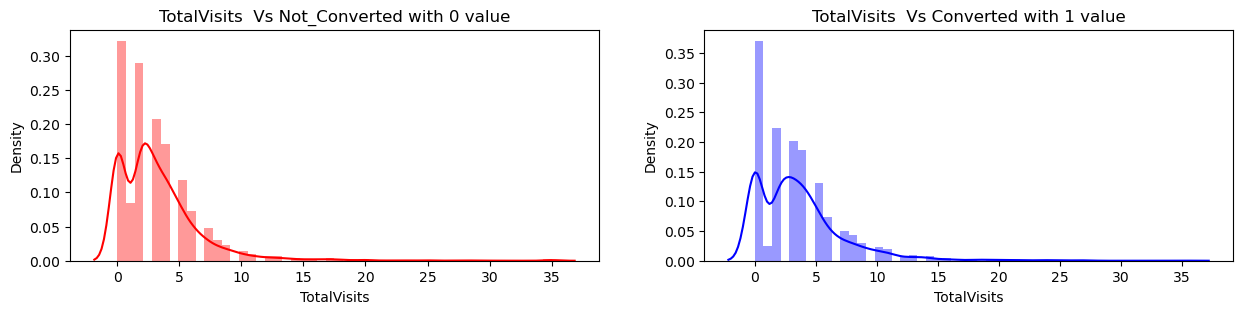

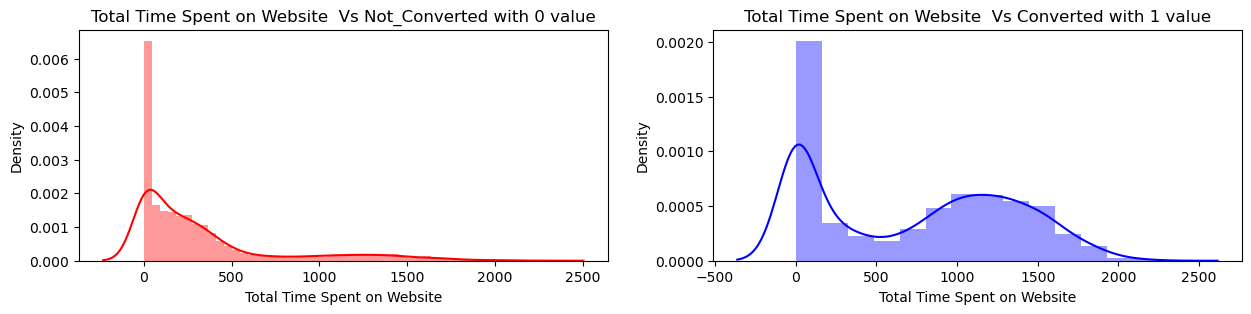

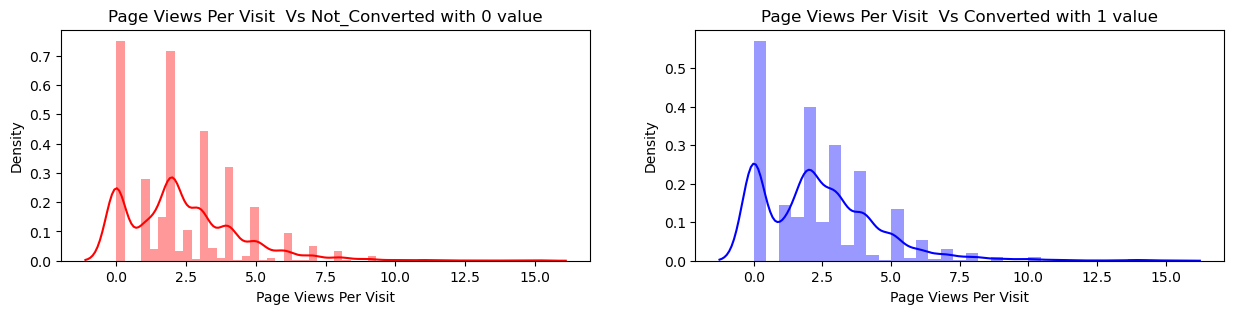

In [5121]:
#plot distribution plot for numerical variable using for loop
import warnings
warnings.filterwarnings('ignore')
for i in numerical_var: 
    plt.figure(figsize=(15,3))
    plt.subplot(121)
    sns.distplot(leads_not_converted[i], color='r' )
    plt.title(i + "  Vs Not_Converted with 0 value")
    plt.subplot(122)
    sns.distplot(leads_converted[i], color='b')
    plt.title(i + "  Vs Converted with 1 value")
    plt.show()

#### we can see above, leads who send more time on website are likely to be successfully converted

### Converting binary variable to 0 and 1.
### Creating Dummy variables for categorical variable

In [5122]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5123]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9074 non-null   int64  
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Do Not Email                            9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Country                                 9074 non-null   object 
 10  Specialization                          9074 non-null   obje

#### We have two variable 'Do Not Email' and 'A free copy of Mastering The Interview' having binary values

In [5124]:
## check Do Not Email
leads['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [5125]:
## check Do Not Email
leads['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [5126]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Ringing,Might be,Mumbai,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,No,Modified


In [5127]:
#### lets change the value to 0 and 1
leads['Do Not Email']=leads['Do Not Email'].apply(lambda x: 1 if x == 'Yes' else 0)
leads['A free copy of Mastering The Interview']=leads['A free copy of Mastering The Interview'].apply(lambda x: 1 if x == 'Yes' else 0)

In [5128]:
# validate
leads['Do Not Email'].value_counts()

0    8358
1     716
Name: Do Not Email, dtype: int64

In [5129]:
#validate
leads['A free copy of Mastering The Interview'].value_counts()

0    6186
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [5130]:
leads.Country.value_counts()

India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [5131]:
### lets put those countries in others which having count less than or equal to 10
country =['Qatar','Hong Kong','Oman'
          ,'Bahrain','France','Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria','Germany', 'Asia/Pacific Region','Uganda', 'Kenya','Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia','Liberia',
          'Switzerland', 'Denmark', 'Philippines','Bangladesh','Vietnam', 'Indonesia','Russia','Belgium','Ghana','Kuwait']
leads['Country']=leads['Country'].apply(lambda x:'Other Countries' if x in country else x)

In [5132]:
# check Coutry column
leads['Country'].value_counts()

India                   8787
Other Countries           92
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Name: Country, dtype: int64

### Let's create dummy variable

In [5133]:
### lets create dummy variables for categorical columns
cat_var= ['Lead Origin', 'Lead Source','Last Activity', 'Country', 'Specialization',
         'What is your current occupation', 'Tags', 'Lead Quality', 'City','Last Notable Activity']

In [5134]:
#transofrm Lead Origin into dummy variable
Lead_Origin_dummies= pd.get_dummies(leads['Lead Origin'], prefix='Lead Origin_', drop_first=True)
Lead_Origin_dummies.head()

,Lead Origin__Landing Page Submission,Lead Origin__Lead Add Form,Lead Origin__Lead Import
0,0,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [5135]:
#transofrm Lead Source into dummy variable
Lead_Source_dummies= pd.get_dummies(leads['Lead Source'], prefix='Lead Source_', drop_first=True)
Lead_Source_dummies.head()

,Lead Source__Direct Traffic,Lead Source__Facebook,Lead Source__Google,Lead Source__Olark Chat,Lead Source__Organic Search,Lead Source__Others,Lead Source__Reference,Lead Source__Referral Sites,Lead Source__Welingak Website,Lead Source__bing
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [5136]:
#transofrm Last Activity into dummy variable
Last_Activity_dummies= pd.get_dummies(leads['Last Activity'], prefix='Last_Activity_', drop_first=True)
Last_Activity_dummies.head()

,Last_Activity__Email Bounced,Last_Activity__Email Link Clicked,Last_Activity__Email Opened,Last_Activity__Form Submitted on Website,Last_Activity__Had a Phone Conversation,Last_Activity__Olark Chat Conversation,Last_Activity__Others Activity,Last_Activity__Page Visited on Website,Last_Activity__SMS Sent,Last_Activity__Unreachable,Last_Activity__Unsubscribed
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0


In [5137]:
#transofrm Country into dummy variable
Country_dummies= pd.get_dummies(leads['Country'], prefix='Country_', drop_first=True)
Country_dummies.head()

,Country__India,Country__Other Countries,Country__Saudi Arabia,Country__Singapore,Country__United Arab Emirates,Country__United Kingdom,Country__United States
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [5138]:
#transofrm Specialization into dummy variable
Specialization_dummies= pd.get_dummies(leads['Specialization'], prefix='Specialization_', drop_first=True)
Specialization_dummies.head()

,Specialization__Business Administration,Specialization__E-Business,Specialization__E-COMMERCE,Specialization__Finance Management,Specialization__Healthcare Management,Specialization__Hospitality Management,Specialization__Human Resource Management,Specialization__IT Projects Management,Specialization__International Business,Specialization__Marketing Management,Specialization__Media and Advertising,Specialization__Operations Management,Specialization__Others,Specialization__Retail Management,Specialization__Rural and Agribusiness,Specialization__Services Excellence,Specialization__Supply Chain Management,Specialization__Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [5139]:
#transofrm What is your current occupation into dummy variable
Occupation_dummies= pd.get_dummies(leads['What is your current occupation'], prefix='Occupation_', drop_first=True)
Occupation_dummies.head()

,Occupation__Housewife,Occupation__Other,Occupation__Student,Occupation__Unemployed,Occupation__Working Professional
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [5140]:
#transofrm Tags into dummy variable
Tags_dummies= pd.get_dummies(leads['Tags'], prefix='Tags_', drop_first=True)
Tags_dummies.head()

,Tags__Busy,Tags__Closed by Horizzon,Tags__Diploma holder (Not Eligible),Tags__Graduation in progress,Tags__Interested in full time MBA,Tags__Interested in other courses,Tags__Lost to EINS,Tags__Not doing further education,Tags__Other Tags,Tags__Ringing,Tags__Will revert after reading the email,Tags__in touch with EINS,Tags__opp hangup,Tags__switched off
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [5141]:
#transofrm Lead Quality into dummy variable
Lead_Quality_dummies= pd.get_dummies(leads['Lead Quality'], prefix='Lead_Quality_', drop_first=True)
Lead_Quality_dummies.head()

,Lead_Quality__Low in Relevance,Lead_Quality__Might be,Lead_Quality__Not Sure,Lead_Quality__Worst
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0


In [5142]:
#transofrm City into dummy variable
City_dummies= pd.get_dummies(leads['City'], prefix='City_', drop_first=True)
City_dummies.head()

,City__Other Cities,City__Other Cities of Maharashtra,City__Other Metro Cities,City__Thane & Outskirts,City__Tier II Cities
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [5143]:
#transofrm Last Notable Activity into dummy variable
Last_Notable_Activity_dummies= pd.get_dummies(leads['Last Notable Activity'], prefix='Last_Notable_Activity_dummies_', drop_first=True)
Last_Notable_Activity_dummies.head()

,Last_Notable_Activity_dummies__Email Link Clicked,Last_Notable_Activity_dummies__Email Opened,Last_Notable_Activity_dummies__Had a Phone Conversation,Last_Notable_Activity_dummies__Modified,Last_Notable_Activity_dummies__Olark Chat Conversation,Last_Notable_Activity_dummies__Other Last Notable Activity,Last_Notable_Activity_dummies__Page Visited on Website,Last_Notable_Activity_dummies__SMS Sent,Last_Notable_Activity_dummies__Unreachable,Last_Notable_Activity_dummies__Unsubscribed
0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0


In [5144]:
#concat all the dummy columsn with original dataset
leads=pd.concat([leads,Last_Notable_Activity_dummies,City_dummies,Lead_Quality_dummies,Tags_dummies,
                 Occupation_dummies,Specialization_dummies,Country_dummies,Last_Activity_dummies,Lead_Source_dummies
                ,Lead_Origin_dummies], axis=1)

In [5145]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Lead Source__Olark Chat,Lead Source__Organic Search,Lead Source__Others,Lead Source__Reference,Lead Source__Referral Sites,Lead Source__Welingak Website,Lead Source__bing,Lead Origin__Landing Page Submission,Lead Origin__Lead Add Form,Lead Origin__Lead Import
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,...,1,0,0,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,...,0,1,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,...,0,0,0,0,0,0,0,1,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,...,0,0,0,0,0,0,0,1,0,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,0,0,0,0,0,1,0,0


In [5146]:
### Now drop existing categorical columns
leads.drop(cat_var, axis=1,inplace= True)

In [5147]:
leads.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last_Notable_Activity_dummies__Email Link Clicked,Last_Notable_Activity_dummies__Email Opened,Last_Notable_Activity_dummies__Had a Phone Conversation,...,Lead Source__Olark Chat,Lead Source__Organic Search,Lead Source__Others,Lead Source__Reference,Lead Source__Referral Sites,Lead Source__Welingak Website,Lead Source__bing,Lead Origin__Landing Page Submission,Lead Origin__Lead Add Form,Lead Origin__Lead Import
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,660719,0,0,1.0,305,1.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,660681,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Splitting the data into train and test

In [5148]:
#### Splitting the data into train and test
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(leads, train_size = 0.7, test_size = 0.3, random_state = 100)

In [5149]:
df_train.shape

(6351, 94)

In [5150]:
df_test.shape

(2723, 94)

In [5151]:
### rescailing the features TotalVisits, Total Time Spent on Website, Page Views Per Visit
from sklearn.preprocessing import MinMaxScaler

In [5152]:
scaler = MinMaxScaler()

In [5153]:
# Apply scaler() to temp, atemp,hum,windspeed, cnt variables to make it b/w 0 to 1
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [5154]:
df_train.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last_Notable_Activity_dummies__Email Link Clicked,Last_Notable_Activity_dummies__Email Opened,Last_Notable_Activity_dummies__Had a Phone Conversation,...,Lead Source__Olark Chat,Lead Source__Organic Search,Lead Source__Others,Lead Source__Reference,Lead Source__Referral Sites,Lead Source__Welingak Website,Lead Source__bing,Lead Origin__Landing Page Submission,Lead Origin__Lead Add Form,Lead Origin__Lead Import
3009,630949,0,0,0.057143,0.178347,0.133333,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1012,649355,1,0,0.057143,0.085355,0.133333,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9226,579735,0,0,0.000000,0.000000,0.000000,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4750,614238,0,1,0.057143,0.619946,0.133333,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7987,588625,0,1,0.142857,0.711590,0.166667,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5155]:
##Divide independent and dependent variable into X and Y for training set
y_train= df_train['Converted']

In [5156]:
X_train=df_train.loc[:, ~df_train.columns.isin(['Converted','Lead Number'])]

In [5157]:
#import RFE libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [5158]:
from sklearn.linear_model import LogisticRegression
#using RFE to select 10 variables
lr = LogisticRegression()
lr.fit(X_train, y_train)
rfe = RFE(lr,n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [5159]:
#make a list of X_train columns,suuport, rfe ranking
tuple(zip(X_train.columns, rfe.support_, rfe.ranking_))

(('Do Not Email', True, 1),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 38),
 ('Last_Notable_Activity_dummies__Email Link Clicked', False, 19),
 ('Last_Notable_Activity_dummies__Email Opened', False, 58),
 ('Last_Notable_Activity_dummies__Had a Phone Conversation', False, 9),
 ('Last_Notable_Activity_dummies__Modified', True, 1),
 ('Last_Notable_Activity_dummies__Olark Chat Conversation', True, 1),
 ('Last_Notable_Activity_dummies__Other Last Notable Activity', False, 34),
 ('Last_Notable_Activity_dummies__Page Visited on Website', False, 18),
 ('Last_Notable_Activity_dummies__SMS Sent', True, 1),
 ('Last_Notable_Activity_dummies__Unreachable', False, 65),
 ('Last_Notable_Activity_dummies__Unsubscribed', False, 21),
 ('City__Other Cities', False, 43),
 ('City__Other Cities of Maharashtra', False, 54),
 ('City__Other Metro Cities', False, 55),
 ('City__Thane & Outskirts', F

In [5160]:
#select columns which haing True value
col= X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last_Notable_Activity_dummies__Modified',
       'Last_Notable_Activity_dummies__Olark Chat Conversation',
       'Last_Notable_Activity_dummies__SMS Sent', 'Lead_Quality__Might be',
       'Lead_Quality__Not Sure', 'Lead_Quality__Worst', 'Tags__Busy',
       'Tags__Closed by Horizzon', 'Tags__Interested  in full time MBA',
       'Tags__Interested in other courses', 'Tags__Lost to EINS',
       'Tags__Ringing', 'Tags__Will revert after reading the email',
       'Tags__switched off', 'Occupation__Unemployed',
       'Occupation__Working Professional', 'Specialization__Others',
       'Last_Activity__Had a Phone Conversation', 'Last_Activity__SMS Sent',
       'Lead Source__Welingak Website', 'Lead Origin__Landing Page Submission',
       'Lead Origin__Lead Add Form'],
      dtype='object')

#### Model Building

In [5161]:
import statsmodels.api as sm

In [5162]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1421.1
Date:                Sun, 17 Mar 2024   Deviance:                       2842.3
Time:                        15:46:45   Pearson chi2:                 2.44e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5875
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.5306      0.532      0.997      0.319      -0.513       1.574
Do Not Email                                              -1.3399      0.232     -5.776      0.000      -1.795      -0.885
Total Time Spent on Website                                4.2841      0.222     19.282      0.000       3.849       4.720
Page Views Per Visit                                      -1.1662      0.434     -2.689      0.007      -2.016      -0.316
Last_Notable_Activity_dummies__Modified                   -1.2093      0.133     -9.119      0.000      -1.469      -0.949
Last_Notable_Activity_dummies__Olark Chat Conversation    -1.4675      0.380     -3.865      0.000      -2.212      -0.723
Last_Notable_Activity_dummies__SMS Sent                    1.3214      0.234      5.648      0.000       0.863       1.780
Lead_Quality__Might be                                    -3.2136      0.224    -14.365      0.000      -3.652      -2.775
Lead_Quality__Not Sure                                    -1.3026      0.301     -4.327      0.000      -1.893      -0.713
Lead_Quality__Worst                                       -4.6228      0.891     -5.188      0.000      -6.369      -2.876
Tags__Busy                                                 1.8561      0.400      4.634      0.000       1.071       2.641
Tags__Closed by Horizzon                                   8.2187      0.821     10.011      0.000       6.610       9.828
Tags__Interested  in full time MBA                        -1.4455      1.009     -1.433      0.152      -3.422       0.531
Tags__Interested in other courses                         -0.8453      0.489     -1.727      0.084      -1.804       0.114
Tags__Lost to EINS                                         8.8305      0.805     10.972      0.000       7.253      10.408
Tags__Ringing                                             -2.1928      0.407     -5.388      0.000      -2.990      -1.395
Tags__Will revert after reading the email                  3.7077      0.326     11.372      0.000       3.069       4.347
Tags__switched off                                        -2.3364      0.619     -3.775      0.000      -3.549      -1.123
Occupation__Unemployed                                    -1.4791      0.400     -3.693      0.000      -2.264      -0.694
Occupation__Working Professional                           1.0090      0.475      2.125      0.034       0.078       1.940
Specialization__Others                                    -0.9351      0.183     -5.098      0.000      -1.295      -0.576
Last_Activity__Had a Phone Conversation                    2.7503      1.053      2.611      0.009       0.686       4.815
Last_Act

In [5163]:
### we can see Tags__Interested in full time MBA having highest p value among all features hence we will drop it
col_drop_MBA = col.drop('Tags__Interested  in full time MBA')

In [5164]:
# Logistic regression model after dropping Tags__Interested in full time MBA 
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col_drop_MBA])), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1422.5
Date:                Sun, 17 Mar 2024   Deviance:                       2844.9
Time:                        15:46:45   Pearson chi2:                 2.35e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5873
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.3079      0.516      0.596      0.551      -0.704       1.320
Do Not Email                                              -1.3298      0.232     -5.737      0.000      -1.784      -0.875
Total Time Spent on Website                                4.2811      0.222     19.285      0.000       3.846       4.716
Page Views Per Visit                                      -1.1533      0.433     -2.661      0.008      -2.003      -0.304
Last_Notable_Activity_dummies__Modified                   -1.2162      0.132     -9.182      0.000      -1.476      -0.957
Last_Notable_Activity_dummies__Olark Chat Conversation    -1.4678      0.379     -3.870      0.000      -2.211      -0.724
Last_Notable_Activity_dummies__SMS Sent                    1.3174      0.234      5.632      0.000       0.859       1.776
Lead_Quality__Might be                                    -3.2051      0.223    -14.383      0.000      -3.642      -2.768
Lead_Quality__Not Sure                                    -1.3021      0.300     -4.345      0.000      -1.889      -0.715
Lead_Quality__Worst                                       -4.4853      0.897     -4.999      0.000      -6.244      -2.727
Tags__Busy                                                 2.0271      0.392      5.172      0.000       1.259       2.795
Tags__Closed by Horizzon                                   8.3857      0.818     10.256      0.000       6.783       9.988
Tags__Interested in other courses                         -0.6561      0.479     -1.371      0.170      -1.594       0.282
Tags__Lost to EINS                                         8.9845      0.802     11.208      0.000       7.413      10.556
Tags__Ringing                                             -2.0243      0.399     -5.077      0.000      -2.806      -1.243
Tags__Will revert after reading the email                  3.8756      0.317     12.226      0.000       3.254       4.497
Tags__switched off                                        -2.1677      0.613     -3.534      0.000      -3.370      -0.965
Occupation__Unemployed                                    -1.4446      0.397     -3.637      0.000      -2.223      -0.666
Occupation__Working Professional                           1.0024      0.470      2.131      0.033       0.080       1.924
Specialization__Others                                    -0.9211      0.183     -5.038      0.000      -1.279      -0.563
Last_Activity__Had a Phone Conversation                    2.7497      1.053      2.610      0.009       0.685       4.814
Last_Activity__SMS Sent                                    1.2780      0.195      6.564      0.000       0.896       1.660
Lead Sou

In [5165]:
### Now we have 'Tags__Interested in other courses' as high p value lets deop it
col_drop_Tag_other_courses=col_drop_MBA.drop('Tags__Interested in other courses')

In [5166]:
# Logistic regression model after dropping Tag_other_courses 
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col_drop_Tag_other_courses])), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1423.4
Date:                Sun, 17 Mar 2024   Deviance:                       2846.8
Time:                        15:46:45   Pearson chi2:                 2.34e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5872
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.0348      0.480      0.072      0.942      -0.906       0.976
Do Not Email                                              -1.3199      0.232     -5.693      0.000      -1.774      -0.866
Total Time Spent on Website                                4.2833      0.222     19.303      0.000       3.848       4.718
Page Views Per Visit                                      -1.1697      0.433     -2.700      0.007      -2.019      -0.321
Last_Notable_Activity_dummies__Modified                   -1.2231      0.132     -9.245      0.000      -1.482      -0.964
Last_Notable_Activity_dummies__Olark Chat Conversation    -1.4685      0.379     -3.873      0.000      -2.212      -0.725
Last_Notable_Activity_dummies__SMS Sent                    1.3155      0.234      5.627      0.000       0.857       1.774
Lead_Quality__Might be                                    -3.1786      0.220    -14.425      0.000      -3.611      -2.747
Lead_Quality__Not Sure                                    -1.2638      0.298     -4.247      0.000      -1.847      -0.681
Lead_Quality__Worst                                       -4.3045      0.901     -4.778      0.000      -6.070      -2.539
Tags__Busy                                                 2.2575      0.364      6.208      0.000       1.545       2.970
Tags__Closed by Horizzon                                   8.6283      0.803     10.750      0.000       7.055      10.201
Tags__Lost to EINS                                         9.2107      0.788     11.682      0.000       7.665      10.756
Tags__Ringing                                             -1.7948      0.371     -4.839      0.000      -2.522      -1.068
Tags__Will revert after reading the email                  4.1186      0.275     14.956      0.000       3.579       4.658
Tags__switched off                                        -1.9365      0.595     -3.253      0.001      -3.103      -0.770
Occupation__Unemployed                                    -1.4426      0.397     -3.636      0.000      -2.220      -0.665
Occupation__Working Professional                           0.9870      0.470      2.102      0.036       0.067       1.908
Specialization__Others                                    -0.9185      0.183     -5.032      0.000      -1.276      -0.561
Last_Activity__Had a Phone Conversation                    2.7470      1.054      2.607      0.009       0.682       4.812
Last_Activity__SMS Sent                                    1.2796      0.194      6.580      0.000       0.898       1.661
Lead Source__Welingak Website                              2.7083      0.815      3.321      0.001       1.110       4.307
Lead Ori

### now all p-values are below 0.05, we are good in terms of p-vlaue

In [5167]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5168]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_drop_Tag_other_courses].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_drop_Tag_other_courses].values, i) for i in range(X_train[col_drop_Tag_other_courses].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Occupation__Unemployed,16.58
6,Lead_Quality__Might be,8.05
13,Tags__Will revert after reading the email,6.41
5,Last_Notable_Activity_dummies__SMS Sent,6.40
21,Lead Origin__Landing Page Submission,6.35
19,Last_Activity__SMS Sent,6.06
17,Specialization__Others,4.47
2,Page Views Per Visit,3.33
7,Lead_Quality__Not Sure,2.57
3,Last_Notable_Activity_dummies__Modified,2.37


In [5169]:
### we can see Occupation__Unemployed has very high vif lets drop it
col_drop_Unemployed =  col_drop_Tag_other_courses.drop('Occupation__Unemployed')

In [5170]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_drop_Unemployed].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_drop_Unemployed].values, i) for i in range(X_train[col_drop_Unemployed].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Lead_Quality__Might be,6.83
5,Last_Notable_Activity_dummies__SMS Sent,6.37
18,Last_Activity__SMS Sent,6.04
20,Lead Origin__Landing Page Submission,5.76
13,Tags__Will revert after reading the email,5.15
16,Specialization__Others,4.00
2,Page Views Per Visit,3.24
7,Lead_Quality__Not Sure,2.28
3,Last_Notable_Activity_dummies__Modified,2.27
1,Total Time Spent on Website,2.25


In [5171]:
### we can see Lead_Quality__Might be has very high vif lets drop it
col_drop_Quality_Mightbe =  col_drop_Unemployed.drop('Lead_Quality__Might be')

In [5172]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_drop_Quality_Mightbe].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_drop_Quality_Mightbe].values, i) for i in range(X_train[col_drop_Quality_Mightbe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last_Notable_Activity_dummies__SMS Sent,6.34
17,Last_Activity__SMS Sent,6.04
19,Lead Origin__Landing Page Submission,4.85
12,Tags__Will revert after reading the email,4.65
2,Page Views Per Visit,3.20
15,Specialization__Others,2.96
1,Total Time Spent on Website,2.24
3,Last_Notable_Activity_dummies__Modified,2.17
11,Tags__Ringing,1.89
20,Lead Origin__Lead Add Form,1.83


In [5173]:
### Now we have Last_Notable_Activity_dummies__SMS Sent has high vif
col_drop_Activity_dummies_SMS_Sent = col_drop_Quality_Mightbe.drop('Last_Notable_Activity_dummies__SMS Sent')

In [5174]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_drop_Activity_dummies_SMS_Sent].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_drop_Activity_dummies_SMS_Sent].values, i) for i in range(X_train[col_drop_Activity_dummies_SMS_Sent].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Lead Origin__Landing Page Submission,4.83
11,Tags__Will revert after reading the email,4.64
2,Page Views Per Visit,3.20
14,Specialization__Others,2.91
1,Total Time Spent on Website,2.23
10,Tags__Ringing,1.89
19,Lead Origin__Lead Add Form,1.83
16,Last_Activity__SMS Sent,1.72
3,Last_Notable_Activity_dummies__Modified,1.71
5,Lead_Quality__Not Sure,1.48


### Now, we have all vif under 5. We are good here as well

### Let's create our final model after removing highly correlated features and making p-value <0.05

In [5175]:
# Logistic regression model after dropping Activity_dummies_SMS_Sent 
X_train_sm = sm.add_constant(X_train[col_drop_Activity_dummies_SMS_Sent])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1619.8
Date:                Sun, 17 Mar 2024   Deviance:                       3239.6
Time:                        15:46:46   Pearson chi2:                 1.37e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5609
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.0630      0.278    -11.023      0.000      -3.608      -2.518
Do Not Email                                              -1.3841      0.218     -6.335      0.000      -1.812      -0.956
Total Time Spent on Website                                4.5314      0.212     21.361      0.000       4.116       4.947
Page Views Per Visit                                      -1.2681      0.403     -3.149      0.002      -2.057      -0.479
Last_Notable_Activity_dummies__Modified                   -1.7062      0.105    -16.287      0.000      -1.911      -1.501
Last_Notable_Activity_dummies__Olark Chat Conversation    -1.8439      0.375     -4.923      0.000      -2.578      -1.110
Lead_Quality__Not Sure                                     1.4198      0.228      6.216      0.000       0.972       1.867
Lead_Quality__Worst                                       -1.9672      0.820     -2.400      0.016      -3.574      -0.360
Tags__Busy                                                 1.7245      0.332      5.195      0.000       1.074       2.375
Tags__Closed by Horizzon                                   8.8009      0.770     11.429      0.000       7.292      10.310
Tags__Lost to EINS                                         8.6094      0.797     10.800      0.000       7.047      10.172
Tags__Ringing                                             -2.1803      0.337     -6.464      0.000      -2.841      -1.519
Tags__Will revert after reading the email                  3.4528      0.242     14.242      0.000       2.978       3.928
Tags__switched off                                        -2.2577      0.577     -3.912      0.000      -3.389      -1.127
Occupation__Working Professional                           2.6822      0.273      9.812      0.000       2.146       3.218
Specialization__Others                                    -1.4585      0.168     -8.677      0.000      -1.788      -1.129
Last_Activity__Had a Phone Conversation                    2.6455      1.055      2.507      0.012       0.577       4.714
Last_Activity__SMS Sent                                    1.9387      0.102     18.918      0.000       1.738       2.140
Lead Source__Welingak Website                              1.9522      0.806      2.423      0.015       0.373       3.531
Lead Origin__Landing Page Submission                      -1.5767      0.168     -9.385      0.000      -1.906      -1.247
Lead Origin__Lead Add Form                                 2.2941      0.345      6.658      0.000       1.619       2.969
==========================================================================================================================
"""

In [5176]:
# Assign all final features list to some meaining variable "final_col" 
final_col=col_drop_Activity_dummies_SMS_Sent

In [5177]:
final_col

Index(['Do Not Email', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last_Notable_Activity_dummies__Modified',
       'Last_Notable_Activity_dummies__Olark Chat Conversation',
       'Lead_Quality__Not Sure', 'Lead_Quality__Worst', 'Tags__Busy',
       'Tags__Closed by Horizzon', 'Tags__Lost to EINS', 'Tags__Ringing',
       'Tags__Will revert after reading the email', 'Tags__switched off',
       'Occupation__Working Professional', 'Specialization__Others',
       'Last_Activity__Had a Phone Conversation', 'Last_Activity__SMS Sent',
       'Lead Source__Welingak Website', 'Lead Origin__Landing Page Submission',
       'Lead Origin__Lead Add Form'],
      dtype='object')

#### Let's do prediction on training set

In [5178]:
y_train_pred = res.predict(X_train_sm).values

In [5179]:
y_train_pred[:10]

array([0.36636859, 0.24422545, 0.0063714 , 0.96745036, 0.99982228,
       0.92994077, 0.19272841, 0.9892968 , 0.91810835, 0.02391011])

#### create datframe with actual converted values and predicted values

In [5180]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead_Id']=y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Id
0,0,0.366369,3009
1,0,0.244225,1012
2,0,0.006371,9226
3,1,0.967450,4750
4,1,0.999822,7987


#### let's take cutoff as 0.5

In [5181]:
y_train_pred_final['Predicted']=y_train_pred_final['Converted_Prob'].apply(lambda x: 1 if x>0.5 else 0)

In [5182]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Id,Predicted
0,0,0.366369,3009,0
1,0,0.244225,1012,0
2,0,0.006371,9226,0
3,1,0.967450,4750,1
4,1,0.999822,7987,1


In [5183]:
from sklearn import metrics

##### Confusion Matrix

In [5184]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3654  251]
 [ 352 2094]]


In [5185]:
# Predicted     not_converted-0    Converted-1
# Actual                          
# not_converted-0       3654      251
# convetted-1            352      2094  

In [5186]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9050543221539915


#### Metrics other than accuracy

In [5187]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [5188]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8560915780866721

In [5189]:
# Let us calculate specificity
TN / float(TN+FP)

0.9357234314980793

In [5190]:
# lets calculate precision
print (TP / float(TP+FP))

0.8929637526652452


In [5191]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9121318022965552


### ROC Curve

In [5192]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [5193]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

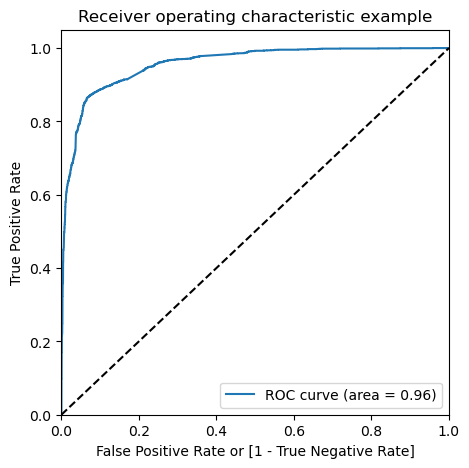

In [5194]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding optimal cutoff

In [5195]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Id,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.366369,3009,0,1,1,1,1,0,0,0,0,0,0
1,0,0.244225,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.006371,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.967450,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.999822,7987,1,1,1,1,1,1,1,1,1,1,1


In [5196]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.802708  0.969338  0.698335
0.2   0.2  0.830893  0.959117  0.750576
0.3   0.3  0.878129  0.904334  0.861716
0.4   0.4  0.901905  0.875715  0.918310
0.5   0.5  0.905054  0.856092  0.935723
0.6   0.6  0.897654  0.819706  0.946479
0.7   0.7  0.886002  0.763696  0.962612
0.8   0.8  0.853251  0.653312  0.978489
0.9   0.9  0.826641  0.566231  0.989757


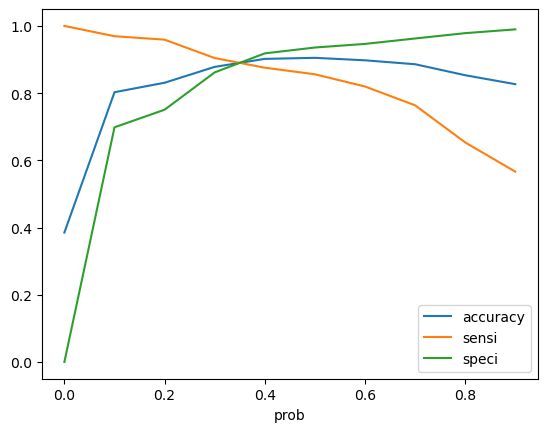

In [5197]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### As we can see the cutoff is around 0.37. let' s take cutoff as 0.37

In [5198]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Id,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.366369,3009,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.244225,1012,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.006371,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.967450,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.999822,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [5199]:
# Confusion matrix 
confusion_final = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion_final)

[[3545  360]
 [ 287 2159]]


In [5200]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.8981262793260903


In [5201]:
### Other metrics

In [5202]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

In [5203]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8826655764513491

In [5204]:
# Let us calculate specificity
TN / float(TN+FP)

0.9078104993597952

In [5205]:
    # Calculate false postive rate - predicting non converted to converted
print(FP/ float(TN+FP))

0.09218950064020487


In [5206]:
# Positive predictive rate
print (TP / float(TP+FP))

0.8570861452957523


In [5207]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9251043841336117


In [5208]:
from sklearn.metrics import precision_score, recall_score

In [5209]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8570861452957523

In [5210]:
y_train_pred_final.columns

Index([      'Converted',  'Converted_Prob',         'Lead_Id',
             'Predicted',               0.0,               0.1,
                     0.2,               0.3,               0.4,
                     0.5,               0.6,               0.7,
                     0.8,               0.9, 'final_predicted'],
      dtype='object')

In [5211]:
y_train_pred_final[['Converted','Converted_Prob','Lead_Id','final_predicted']]

,Converted,Converted_Prob,Lead_Id,final_predicted
0,0,0.366369,3009,0
1,0,0.244225,1012,0
2,0,0.006371,9226,0
3,1,0.967450,4750,1
4,1,0.999822,7987,1
...,...,...,...,...
6346,0,0.174982,367,0
6347,1,0.955725,82,1
6348,0,0.078054,8199,0
6349,0,0.062488,7077,0


In [5212]:
### Create lead score feature and multiply the values of Converted_Prob with 100
y_train_pred_final['Lead_Score']=y_train_pred_final['Converted_Prob']*100

In [5213]:
y_train_pred_final

,Converted,Converted_Prob,Lead_Id,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.366369,3009,0,1,1,1,1,0,0,0,0,0,0,0,36.636859
1,0,0.244225,1012,0,1,1,1,0,0,0,0,0,0,0,0,24.422545
2,0,0.006371,9226,0,1,0,0,0,0,0,0,0,0,0,0,0.637140
3,1,0.967450,4750,1,1,1,1,1,1,1,1,1,1,1,1,96.745036
4,1,0.999822,7987,1,1,1,1,1,1,1,1,1,1,1,1,99.982228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,0,0.174982,367,0,1,1,0,0,0,0,0,0,0,0,0,17.498151
6347,1,0.955725,82,1,1,1,1,1,1,1,1,1,1,1,1,95.572474
6348,0,0.078054,8199,0,1,0,0,0,0,0,0,0,0,0,0,7.805361
6349,0,0.062488,7077,0,1,0,0,0,0,0,0,0,0,0,0,6.248764


### Making Preictions on test set

In [5214]:
df_test.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last_Notable_Activity_dummies__Email Link Clicked,Last_Notable_Activity_dummies__Email Opened,Last_Notable_Activity_dummies__Had a Phone Conversation,...,Lead Source__Olark Chat,Lead Source__Organic Search,Lead Source__Others,Lead Source__Reference,Lead Source__Referral Sites,Lead Source__Welingak Website,Lead Source__bing,Lead Origin__Landing Page Submission,Lead Origin__Lead Add Form,Lead Origin__Lead Import
3271,628652,0,0,4.0,157,4.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1490,644500,0,1,5.0,1513,5.0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7936,588935,0,0,2.0,74,2.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4216,619437,0,1,0.0,0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3830,623381,0,0,8.0,164,8.0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [5215]:
y_test=df_test['Converted']

In [5216]:
# Scale 'TotalVisits','Total Time Spent on Website','Page Views Per Visit' features
df_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]= scaler.transform(df_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [5217]:
final_col

Index(['Do Not Email', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last_Notable_Activity_dummies__Modified',
       'Last_Notable_Activity_dummies__Olark Chat Conversation',
       'Lead_Quality__Not Sure', 'Lead_Quality__Worst', 'Tags__Busy',
       'Tags__Closed by Horizzon', 'Tags__Lost to EINS', 'Tags__Ringing',
       'Tags__Will revert after reading the email', 'Tags__switched off',
       'Occupation__Working Professional', 'Specialization__Others',
       'Last_Activity__Had a Phone Conversation', 'Last_Activity__SMS Sent',
       'Lead Source__Welingak Website', 'Lead Origin__Landing Page Submission',
       'Lead Origin__Lead Add Form'],
      dtype='object')

In [5218]:
# Create X_test by filter the final features which we used to train the model
X_test=df_test[final_col]

In [5219]:
# Add constant
X_test_sm =sm.add_constant(X_test)

In [5220]:
# create y_test_pred
y_test_pred = res.predict(X_test_sm)

In [5221]:
y_test_pred[:10]

3271    0.252133
1490    0.984519
7936    0.252155
4216    0.998214
3830    0.178086
1800    0.801615
6507    0.030692
4821    0.003408
4223    0.959460
4714    0.302338
dtype: float64

In [5222]:
type(y_test_pred)

pandas.core.series.Series

In [5223]:
# Converting y_pred to a dataframe which is an Series
y_test_pred_1 = pd.DataFrame(y_test_pred)

In [5224]:
# Let's see the head
y_test_pred_1.head()

,0
3271,0.252133
1490,0.984519
7936,0.252155
4216,0.998214
3830,0.178086


In [5225]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [5226]:
y_test_df

,Converted
3271,0
1490,1
7936,0
4216,1
3830,0
...,...
850,0
2879,0
6501,1
7155,0


In [5227]:
y_test_df.index

Int64Index([3271, 1490, 7936, 4216, 3830, 1800, 6507, 4821, 4223, 4714,
            ...
            8926, 6448, 6299, 7852, 2258,  850, 2879, 6501, 7155,  376],
           dtype='int64', length=2723)

In [5228]:
# Putting LEAD ID to index
y_test_df['Lead_ID'] = y_test_df.index

In [5229]:
# Removing index for both dataframes to append them side by side 
y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [5230]:
# Appending y_test_df and y_pred_1
y_test_pred_final_2 = pd.concat([y_test_df, y_test_pred_1],axis=1)

In [5231]:
y_test_pred_final_2.head()

,Converted,Lead_ID,0
0,0,3271,0.252133
1,1,1490,0.984519
2,0,7936,0.252155
3,1,4216,0.998214
4,0,3830,0.178086


In [5232]:
# Renaming the column 
y_test_pred_final_2= y_test_pred_final_2.rename(columns={ 0 : 'Converted_Prob'})

In [5233]:
y_test_pred_final_2

,Converted,Lead_ID,Converted_Prob
0,0,3271,0.252133
1,1,1490,0.984519
2,0,7936,0.252155
3,1,4216,0.998214
4,0,3830,0.178086
...,...,...,...
2718,0,850,0.208777
2719,0,2879,0.004888
2720,1,6501,0.942299
2721,0,7155,0.109260


In [5234]:
y_test_pred_final_2['final_predicted'] = y_test_pred_final_2.Converted_Prob.map(lambda x: 1 if x > 0.37else 0)

In [5235]:
y_test_pred_final_2.head()

,Converted,Lead_ID,Converted_Prob,final_predicted
0,0,3271,0.252133,0
1,1,1490,0.984519,1
2,0,7936,0.252155,0
3,1,4216,0.998214,1
4,0,3830,0.178086,0


In [5236]:
y_test_pred_final_2['Lead_Score'] = y_test_pred_final_2['Converted_Prob']*100

In [5237]:
y_test_pred_final_2.head()

,Converted,Lead_ID,Converted_Prob,final_predicted,Lead_Score
0,0,3271,0.252133,0,25.213256
1,1,1490,0.984519,1,98.451945
2,0,7936,0.252155,0,25.215523
3,1,4216,0.998214,1,99.821374
4,0,3830,0.178086,0,17.808557


In [5238]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final_2.Converted,y_test_pred_final_2.final_predicted)

0.8876239441792141

In [5239]:
confusion2 = metrics.confusion_matrix(y_test_pred_final_2.Converted, y_test_pred_final_2.final_predicted )
confusion2

array([[1556,  178],
       [ 128,  861]], dtype=int64)

In [5240]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [5241]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8705763397371082

In [5242]:
# Let us calculate specificity
TN / float(TN+FP)

0.8973471741637832

In [5244]:
 # Calculate false postive rate - predicting converted when customer is not converted
print(FP/ float(TN+FP))

0.10265282583621683


In [5245]:
df_test.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last_Notable_Activity_dummies__Email Link Clicked,Last_Notable_Activity_dummies__Email Opened,Last_Notable_Activity_dummies__Had a Phone Conversation,...,Lead Source__Olark Chat,Lead Source__Organic Search,Lead Source__Others,Lead Source__Reference,Lead Source__Referral Sites,Lead Source__Welingak Website,Lead Source__bing,Lead Origin__Landing Page Submission,Lead Origin__Lead Add Form,Lead Origin__Lead Import
3271,628652,0,0,0.114286,0.070530,0.266667,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1490,644500,0,1,0.142857,0.679695,0.333333,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7936,588935,0,0,0.057143,0.033243,0.133333,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4216,619437,0,1,0.000000,0.000000,0.000000,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3830,623381,0,0,0.228571,0.073675,0.533333,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [5246]:
df_test.reset_index(drop=False, inplace=True)

In [5247]:
df_test.head()

,index,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last_Notable_Activity_dummies__Email Link Clicked,Last_Notable_Activity_dummies__Email Opened,...,Lead Source__Olark Chat,Lead Source__Organic Search,Lead Source__Others,Lead Source__Reference,Lead Source__Referral Sites,Lead Source__Welingak Website,Lead Source__bing,Lead Origin__Landing Page Submission,Lead Origin__Lead Add Form,Lead Origin__Lead Import
0,3271,628652,0,0,0.114286,0.070530,0.266667,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1490,644500,0,1,0.142857,0.679695,0.333333,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,7936,588935,0,0,0.057143,0.033243,0.133333,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4216,619437,0,1,0.000000,0.000000,0.000000,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,3830,623381,0,0,0.228571,0.073675,0.533333,1,0,1,...,0,1,0,0,0,0,0,1,0,0


In [5254]:
# Renaming the column 
df_test= df_test.rename(columns={ 'index' : 'Lead_ID'})

In [5259]:
df_test.columns

Index(['Lead_ID', 'Lead Number', 'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Last_Notable_Activity_dummies__Email Link Clicked',
       'Last_Notable_Activity_dummies__Email Opened',
       'Last_Notable_Activity_dummies__Had a Phone Conversation',
       'Last_Notable_Activity_dummies__Modified',
       'Last_Notable_Activity_dummies__Olark Chat Conversation',
       'Last_Notable_Activity_dummies__Other Last Notable Activity',
       'Last_Notable_Activity_dummies__Page Visited on Website',
       'Last_Notable_Activity_dummies__SMS Sent',
       'Last_Notable_Activity_dummies__Unreachable',
       'Last_Notable_Activity_dummies__Unsubscribed', 'City__Other Cities',
       'City__Other Cities of Maharashtra', 'City__Other Metro Cities',
       'City__Thane & Outskirts', 'City__Tier II Cities',
       'Lead_Quality__Low in Relevance', 'Lead_Quality__Might be',
       

In [5260]:
y_test_pred_final_2

,Converted,Lead_ID,Converted_Prob,final_predicted,Lead_Score
0,0,3271,0.252133,0,25.213256
1,1,1490,0.984519,1,98.451945
2,0,7936,0.252155,0,25.215523
3,1,4216,0.998214,1,99.821374
4,0,3830,0.178086,0,17.808557
...,...,...,...,...,...
2718,0,850,0.208777,0,20.877652
2719,0,2879,0.004888,0,0.488847
2720,1,6501,0.942299,1,94.229941
2721,0,7155,0.109260,0,10.926021


In [5263]:
y_test_pred_final_2

,Converted,Lead_ID,Converted_Prob,final_predicted,Lead_Score
0,0,3271,0.252133,0,25.213256
1,1,1490,0.984519,1,98.451945
2,0,7936,0.252155,0,25.215523
3,1,4216,0.998214,1,99.821374
4,0,3830,0.178086,0,17.808557
...,...,...,...,...,...
2718,0,850,0.208777,0,20.877652
2719,0,2879,0.004888,0,0.488847
2720,1,6501,0.942299,1,94.229941
2721,0,7155,0.109260,0,10.926021


#### Merge our test data with y-test_pred_final_2

In [5267]:
### Merging both df_test and y_test_pred_final_2 with Lead_ID
df_merged = df_test.merge(y_test_pred_final_2[['final_predicted','Lead_Score','Lead_ID']], on = 'Lead_ID', how = 'left')

In [5269]:
df_merged[['Lead Number','final_predicted','Lead_Score', 'Converted']]

,Lead Number,final_predicted,Lead_Score,Converted
0,628652,0,25.213256,0
1,644500,1,98.451945,1
2,588935,0,25.215523,0
3,619437,1,99.821374,1
4,623381,0,17.808557,0
...,...,...,...,...
2718,651517,0,20.877652,0
2719,632055,0,0.488847,0
2720,600013,1,94.229941,1
2721,594617,0,10.926021,0


### Summary

# Cut-off 0.37

## test Metrices
sensitivity- 0.87
specificity 0.89
accuracy  0.89


## train Metrices

sensitivity- 0.88
specificity 0.9
accuracy  0.9

We need to focus on Senstivity as we need to reduce False Negative and we can see we have senstivity value as 0.87 and 0.88
on train and test data respectively which is good
